In [2]:
import numpy as np
import time
import matplotlib.pyplot as plt
import random

# Lista 6 (9 pkt.) Termin: 7.01.2021r.

## Zadanie 1 (1 pkt.)

Korzystając z funkcji:

In [2]:
time.time()

1609792392.8707397

zwracającej aktualny czas dokonaj pomiaru czasu wykonania potęgowania modulo. Tzn. weź np. wyrażenie:
$$2^{10^n}\mod3$$ i zmierz czas wykonania dla $n\in[1,9]$, dla każdego $n$ pomiar powtórz 10 razy i uśrednij wyniki, a następnie przedstaw je na wykresie, ze skalą logarytmiczną, przykład rysowania wykresu za pomocą plt (matplotlib.pyplot).

[5.483627319335937e-07, 7.224082946777344e-07, 9.305477142333984e-07, 1.9765615463256832e-06, 2.9856927394866945e-05, 0.0005597407586574555, 0.008260267326903343, 0.06229717903829336, 0.7585988594825037]


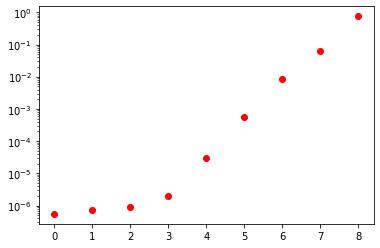

In [3]:
delta=10
times = []
average_time = 0
for n in range(9):
    for j in range(delta):
        a = time.time()
        x = pow(2, pow(10,n)) % 3
        b = time.time()
        average_time += (b-a)
    average_time = average_time/delta
    times.append(average_time)
    
print(times)
plt.yscale('log')#ustawia logarytmiczną skalę na osi y
plt.plot(times,'ro')#rysuje dane z tablicy y za pomocą punktów

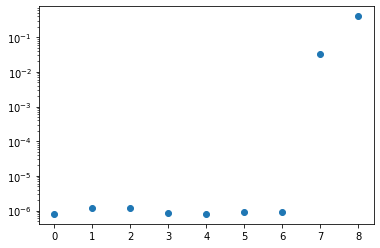

In [15]:
y=[8.106231689453125e-07, 1.1539459228515625e-06, 1.2121200561523439e-06, 8.236646652221679e-07,
       7.976222038269043e-07, 8.903853893280029e-07, 9.23503565788269e-07, 3.21102858e-02,
       4.03478789e-01]
plt.yscale('log')#ustawia logarytmiczną skalę na osi y
plt.plot(y,'o')#rysuje dane z tablicy y za pomocą punktów

## Zadanie 2 (2 pkt.)

Zaimplemetuj szybkie potęgowanie. Napisz funkcję $\textit{pow_mod(x,n,m)}$, która oblicza:
$$x^n\mod m$$.

1. Niech $p=1$.
2. Iteruj po bitach reprezentujących $n$.
3. Przy każdej iteracji zastąp $p$ kwadratem, $p=p^2\%m$.
4. W iteracjach, w ktorych bit jest jednyką, domnóż $x$ do $p$, $p=p*x\%m$.
5. Na końcu $p$ będzie wynikiem $p=x^n\%m$

In [4]:
def pow_mod(x, n, m):
    bits = format(int(n), '0b')
    p = 1
    for i in range(len(bits)):
        p = p * p % m
        if bits[i] == "1":
            p = p * x % m
    return p

In [5]:
print(pow_mod(7,3,2)==1)
print(pow_mod(2,1024,7)==2)
print(pow_mod(3,10**100,7)==4)
print(pow_mod(3**99,10**100,7)==1)

True
True
True
True


## Zadanie 3 (1 pkt.)

Dokonaj pomiaru czasu wykonania funkcji z zad. 2 za pomocą tego samego wyrażenia co w zadaniu 1. Narysuj na jednym wykresie czasy wykonania zależne od n dla metody standardowej (zad.1) i metody z zad.2.

[7.343292236328125e-06, 8.435249328613282e-06, 9.998798370361329e-06, 1.163334846496582e-05, 1.1939854621887207e-05, 1.5141472339630128e-05, 1.753587574958801e-05, 2.001645073413849e-05, 2.2243382439136505e-05]


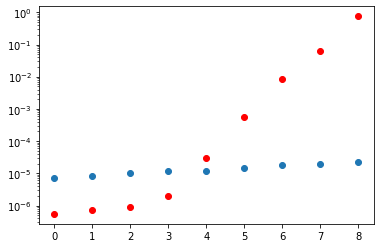

In [6]:
delta = 10
times_fast = []
average_time = 0
for n in range(9):
    for j in range(delta):
        a = time.time()
        x = pow_mod(2, pow(10, n), 3)
        b = time.time()
        average_time += (b-a)
    average_time = average_time/delta
    times_fast.append(average_time)
print(times_fast)
plt.yscale('log')#ustawia logarytmiczną skalę na osi y
plt.plot(times,'ro')#rysuje dane z tablicy y za pomocą punktów
plt.plot(times_fast,'o')#rysuje dane z tablicy y za pomocą punktów

## Zadanie 4 (1 pkt.)

Napisz funkcję znajdującą dla danej liczby $d$ i $n$ taką liczbe $e$, że:
$$d\cdot e=1\mod n$$
czyli inaczej mówiąc odwotność $d$ w ciele $Z_n$. Użyj Rozszerzonego Algorytmu Euklidesa.

In [6]:
def inv(p,n):
    pass

In [7]:
print(inv(5,7)==3)
print(inv(3,2)==1)
print(inv(5,7)==3)
print(inv(3,11)==4)

False
False
False
False


## Zadanie 5 (1 pkt.)

Zaimplementuj test Fermata, który dla danej liczby $p$ sprawdza za pomocą $k$ rund czy jest pierwsza i zwraca $True$ lub $False$.

Male twierdzenie Fermata mówi, że jeżeli $p$ jest liczbą pierwszą i $a$ nie jest podzielne przez $p$ to $a^{p-1}$ jest równe $1$ modulo $p$:

$$p\in\mathbb{P}\ \wedge\ p\nmid a\ \Longrightarrow\ a^{p-1}=1\mod p$$

zatem biorąc zaprzeczenie powyższej implikacji mamy:

$$a^{p-1}\neq1\mod p\ \Longrightarrow\ p\notin\mathbb{P}\ \vee\ p\mid a$$

Tzn. jeżeli weźmiemy dowolne $a$ mniejsze od $p$ (w ten sposób wykluczamy $p\mid a$) i równość $a^{p-1}=1\mod p$ nie zajdzie to wiemy, że $p$ jest na pewno liczbą pierwszą, natomiast jezeli $a^{p-1}=1\mod p$ zachodzi wtedy jest duże prawdopodobieństwo, że $p$ jest liczbą pierwszą aczkolwiek nie jest to pewne.

Należy zatem wybrać liczbę $a\in[2,p-2]$, sprawdzić czy zachodzi $a^{p-1}=1\mod p$, jeżeli nie zachodzi to $p$ jest złożone a jesli zachodzi należy wziąć inne $a$ i ponownie sprawdzić, parametr $k$ określa ile razy $a$ bierzemy. Jeżeli po $k$ powtórzeniach za każdym razem równość zachodzi, możemy przyjąć, że $p$ jest pierwsze.

In [8]:
def Fermat_test(p,k):
    pass

In [9]:
print(Fermat_test(71,10)==True)
print(Fermat_test(41,10)==True)
print(Fermat_test(62,10)==False)
print(Fermat_test(84,10)==False)

False
False
False
False


Zaimplementuj funkcję $\textit{gen_p(a,b)}$, która zwraca losową liczbę pierwszą z przedziału $a$ i $b$, tzn. losuje liczby z tego przedziału i sprawdza czy są pierwsze testem Fermata tak długo aż znajdzie liczbę pierwszą.

In [10]:
def gen_p(a,b):
    pass

## Zadanie 6 (2 pkt.)

Zaimplementuj generację kluczy w ramach algorytmu RSA, napisz funkcję $\textit{key_gen(p,q)}$, która dla podanych dużych liczb pierwszych $p$ i $q$ zwraca parę kluczy w postaci krotki $(n,e,d)$.

1. Obliczamy iloczyn $n=pq$
2. Następnie funkcję Eulera $\phi(n)=(q-1)(p-1)$
3. Klucz publiczny to para $(e,n)$ gdzie $e$ to liczba ze zbioru $\{1,2,..,\phi(n)-1\}$ taka, że $NWD(e,\phi(n))=1$, może być ona ustalona np. jako $e=2^{2^4}+1=65537$, w teście użyto właśnie tej liczby.
4. Klucz prywatny to para $(d,n)$, gdzie $d$ to liczba taka, że $de=1\ mod\ \phi(n)$, czyli $d$ jest odwrotnością $e$ w ciele $\mathbb{Z}_{\phi(n)}$.

In [11]:
def key_gen(p,q):
    pass

In [12]:
p=24130780476900131841553779066939443255102203937160657723394451174808141403858935238883126295228560935516885174421847238379397184900972008801015315248328437

In [13]:
q=26660613491521684005574100352062919789979599401844483402246984186988668019447679726081352452799126206997555710356464145743285983450292024894053538317854159

In [14]:
print(key_gen(p,q)==(
    643341411543391711051425916925550311012265711300705520200325675109446836493100912341600261266222036750541155307483726185012838542757173209246878527615686866322037404779287199511097525538499079836420404197380885254900993985365780000028685663116338197119892656788379026665075201747282243427197060237417498419483,
    65537,
    334692241429603741219438891581498052305769251366366399304669177607406348936208181733781847015759652456012644616150535488014598320266503205353805078033123914361616918116605669461614375732022492713408743728419283824726654095683796656269600488579712785553345684168299073769307373555258299179136288438930486131753))

False


## Zadanie 7 (1 pkt.)

Zaimplementuj funkcję $\textit{enc(x,e,n)}$, która podaną liczbę $x$ (wiadomość) szyfruje za pomocą klucza publicznego $(e,n)$ oraz funkcję $\textit{dec(y,d,n)}$, która podaną liczbę $y$ (szyfrogram) deszyfruje za pomocą klucza prywatnego $(d,n)$.

Szyfrowanie polega na wykonaniu potęgowania modulo:
$$y=x^e\ mod\ n$$
podobnie deszyfracja
$$x=y^d\ mod\ n$$

In [15]:
def enc(x,e,n):
    pass
def dec(y,d,n):
    pass

In [16]:
n=643341411543391711051425916925550311012265711300705520200325675109446836493100912341600261266222036750541155307483726185012838542757173209246878527615686866322037404779287199511097525538499079836420404197380885254900993985365780000028685663116338197119892656788379026665075201747282243427197060237417498419483
e=208350389615113762788111263490297665109355377830736643503856528470357220208290606069461253441671763980314762012190291145414733535673548961910772961435143582756267132618995046438684186252163655289035228721360753675271711075033036291412267917936062230585687839901652792581357105686274730618278123193067279319927
d=502029145905912565237092248595126620632487653124329465045136187249992350554283419049087834111437813928483679744364041267436534897197233494007405790027156754593648940515350675746678776751088177077690779849077150675864299782170211270887279535225267271652686426692746042361641530130191025648848746210219401813175

In [17]:
print(enc(17,e,n)==353230656531616665332116231509462661273082280099289165110086677972943261270362976411810450837847461343993316190457124231852161403281191913264230575248953060776390559207669288928802429515257729255854064666904850354451664771847425807841069296028397747015905377374208615536177338019721932982992946095124218548486)
print(dec(581228535329363957060482357417595500042117791982900743030228020443422357943293873902079555506233253640573184749108783275472243891683169424548126947970217999010556081853170166407244862004725833809785262442186726634369847615830487904940967188707443976155835347542897227831115870912021598488639913865347475436893,d,n)==27)
print(dec(enc(12,e,n),d,n)==12)

False
False
False
